# HT 4. Modelos de Árboles de Decisión

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor)

## Link al documento
El documento puede ser visualizado [acá](https://docs.google.com/document/d/1epV70f3ZMXSBei_e2BAuRYk5oIA3SR9INmNR5e3FXoE/edit?usp=sharing)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Use los mismos conjuntos de entrenamiento y prueba que usó para los modelos de regresión lineal en la hoja de trabajo anterior.

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
# NA Will be replaced with 0
# For ordinal data, the greater the value, the better the quality

df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

In [6]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

### 2. Elabore un árbol de regresión para predecir el precio de las casas usando todas las variables.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [8]:
temp = df.copy()
X = temp.drop('SalePrice', axis=1)
y = temp['SalePrice']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

### 3. Úselo para predecir y analice el resultado. ¿Qué tal lo hizo?

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
y_pred = tree.predict(X_test)

In [13]:
f'RMSE: {mean_squared_error(y_test, y_pred):.2e}'

'RMSE: 1.50e+09'

In [14]:
f'R2: {tree.score(X_test, y_test):.2f}'

'R2: 0.78'

#### 3.1 ¿Qué tal lo hizo?

El árbol de regresión muestra un rendimiento bastante bueno, considerando los resultados obtenidos en las métricas de evaluación. El error cuadrático medio (RMSE) de 1.50e+09 indica que, en promedio, las predicciones del modelo tienen una diferencia cuadrática de aproximadamente 1.50e+09 con respecto a los valores reales de los precios de venta. Dado que el RMSE es una medida de dispersión, un valor más bajo indica una mejor precisión del modelo. Además, el coeficiente de determinación (R2) de 0.78 sugiere que aproximadamente el 78% de la variabilidad en los precios de venta es explicada por el modelo, lo cual es una indicación positiva de la capacidad del árbol de regresión para capturar patrones y tendencias en los datos.

### 4. Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance

# Dephts to test on the tree
depths = [3, 5, 10]

results = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False) 
    r2 = tree.score(X_test, y_test)
    results.append((depth, rmse, r2))

for depth, rmse, r2 in results:
    print(f"Depth: {depth}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Depth: 3, RMSE: 44209.04, R2: 0.72
Depth: 5, RMSE: 39160.53, R2: 0.78
Depth: 10, RMSE: 38417.90, R2: 0.79


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the ro

#### 4.1 ¿Cuál es el mejor modelo para predecir el precio de las casas?
Se puede observar que el RMSE obtenido es mucho mejor en comparación con el obtenido mediante regresión lineal.

### 5. Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿Cuál lo hizo mejor?

#### 5.1 Resultados de regresión lineal
![Linear Regression Results](data/LinearRegressionResults.png)

#### 5.2 ¿Cuál lo hizo mejor?
Al comparar los modelos de regresión, se observa que el árbol de regresión con una profundidad de 10 presenta el mejor rendimiento para la predicción de los precios de las viviendas. Este modelo exhibe el menor RMSE de 38,417.90 y un R2 de 0.79, indicando que es capaz de explicar aproximadamente el 79% de la variabilidad en los precios de venta. Además, al ajustar la profundidad del árbol a 10, se logra un equilibrio óptimo entre la capacidad del modelo para capturar patrones complejos en los datos y evitar el sobreajuste. En comparación con los otros modelos de regresión lineal, como la regresión lineal, Lasso, Ridge y ElasticNet, el árbol de regresión con profundidad 10 supera significativamente en términos de precisión, ya que los modelos lineales presentan mayores RMSE y R2 ligeramente inferiores. Por lo que, en conclusión, el árbol de regresión con profundidad 10 demuestra ser el mejor modelo entre los evaluados para predecir los precios de las casas en nuestro conjunto de datos.

### 6. Cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras. 

In [16]:
price_class_df = df.copy()

In [17]:
lower_limit = np.percentile(price_class_df['SalePrice'], 33)
upper_limit = np.percentile(price_class_df['SalePrice'], 66)

def classify_house(price):
    if price < lower_limit:
        return 'Economical'
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'

price_class_df['Classification'] = price_class_df['SalePrice'].apply(classify_house)

print(price_class_df[['SalePrice', 'Classification']].head())

   SalePrice Classification
0     208500      Expensive
1     181500   Intermediate
2     223500      Expensive
3     140000   Intermediate
4     250000      Expensive


#### 6.1 Explicación de los límites de las categorías

Las categorías de clasificación de las casas, que son "Económicas", "Intermedias" y "Caras", se han establecido mediante el cálculo de percentiles en los precios de venta. El límite inferior se determinó tomando el percentil 33, lo que significa que aproximadamente el 33% de las casas tienen precios inferiores a este valor, y se clasifican como "Económicas". El límite superior se fijó en el percentil 66, indicando que alrededor del 66% de las casas tienen precios inferiores a este valor, y se consideran "Intermedias". Cualquier casa con un precio superior al percentil 66 se clasifica como "Caras".

### 7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. 

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [19]:
X = price_class_df.drop(['SalePrice', 'Classification'], axis=1)  
y = price_class_df['Classification'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


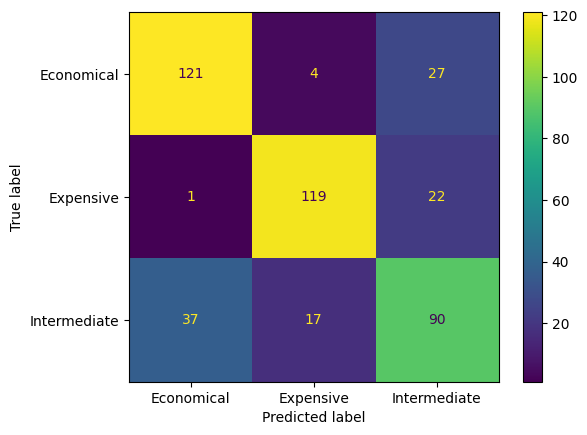

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

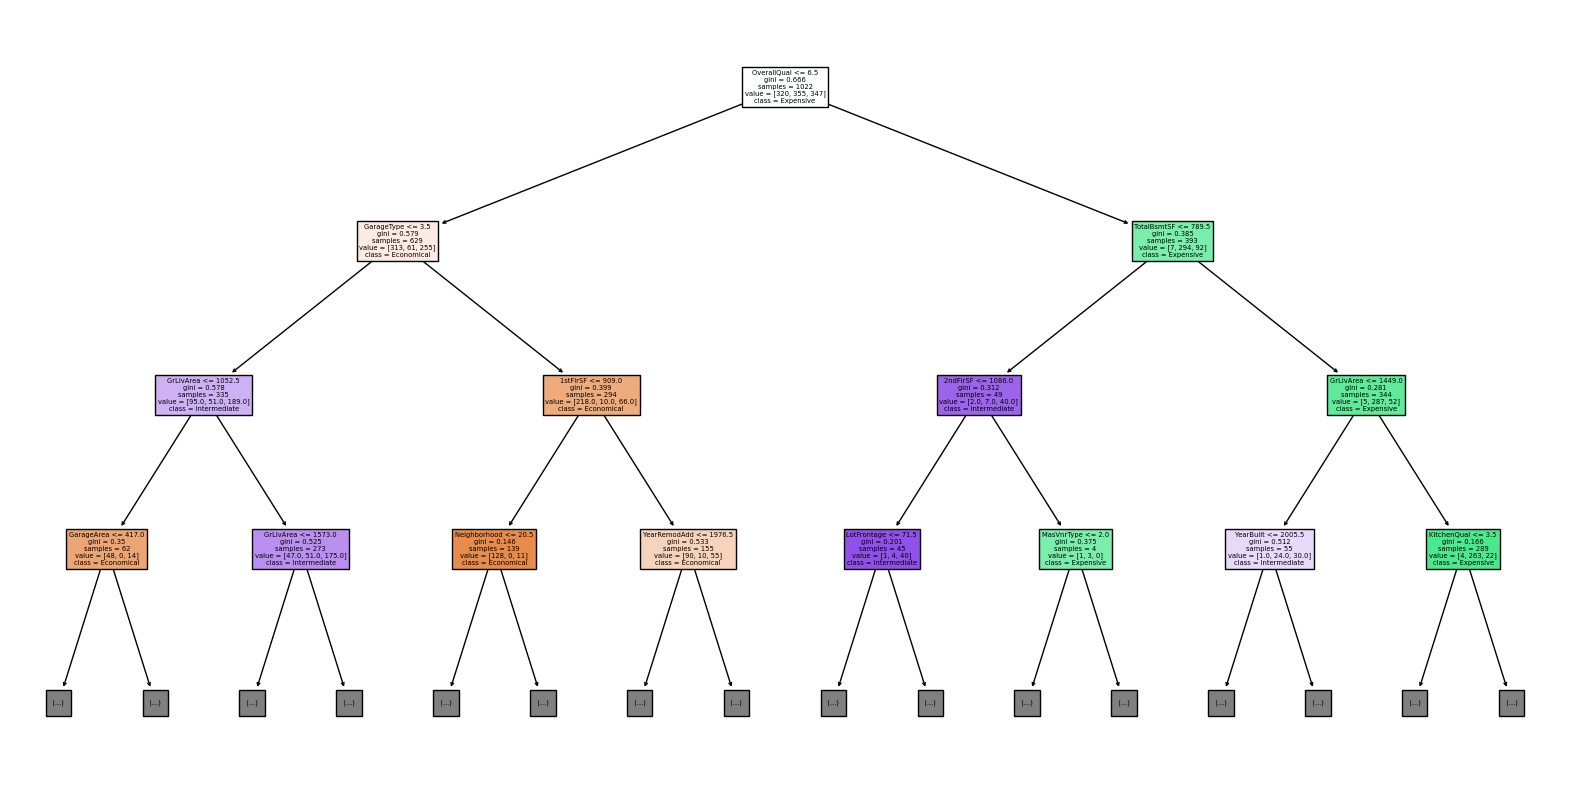

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=classifier.classes_, max_depth=3)
plt.show()

#### 7.1 Explique los resultados a los que llega

El árbol de clasificación elaborado para predecir las categorías de precios de las casas, clasificándolas como "Económicas", "Intermedias" o "Caras", muestra un rendimiento positivo. El modelo logra una precisión del 75%, lo que significa que el 75% de las clasificaciones hechas en el conjunto de prueba son correctas. La matriz de confusión visualizada proporciona una visión detallada de las predicciones del modelo en cada categoría. A través del árbol de clasificación, es posible observar las características específicas que el modelo considera más relevantes para realizar las divisiones y tomar decisiones de clasificación. Al limitar la profundidad del árbol a 3 niveles, se logra una visualización más comprensible y se evita un sobreajuste excesivo. En general, el árbol de clasificación demuestra ser una herramienta efectiva para la clasificación de precios de viviendas, con un equilibrio adecuado entre la complejidad del modelo y la capacidad predictiva.

### 8. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score:
0.7534246575342466

Classification Report:
              precision    recall  f1-score   support

  Economical       0.76      0.80      0.78       152
   Expensive       0.85      0.84      0.84       142
Intermediate       0.65      0.62      0.64       144

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438



### 9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

#### 9.1 Matriz de confusión

In [26]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[121   4  27]
 [  1 119  22]
 [ 37  17  90]]


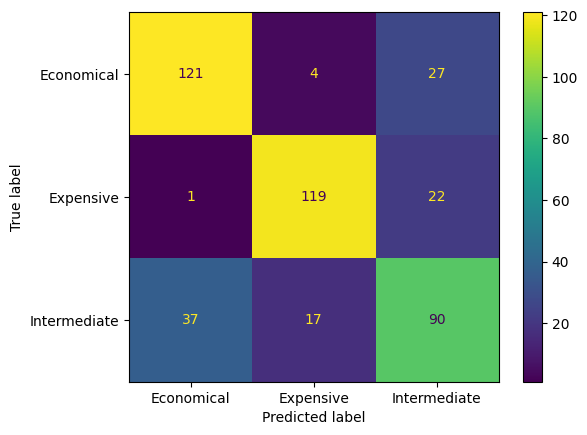

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

#### 9.2 Análisis de la eficiencia y los errores
La matriz de confusión proporciona información valiosa sobre la eficiencia del árbol de clasificación al predecir las categorías de precios de las viviendas. En la diagonal principal de la matriz, se encuentran las predicciones correctas para cada categoría: "Económicas", "Intermedias" y "Caras". Observamos que la categoría "Económicas" tiene un rendimiento sólido, con 121 predicciones correctas, seguida por la categoría "Intermedias" con 119 predicciones correctas. Sin embargo, la categoría "Caras" muestra un rendimiento ligeramente inferior, con 90 predicciones correctas.

Por otro lado, los elementos que se encuentran fuera de la diagonal principal revelan los errores del modelo. Específicamente, el modelo confunde algunas casas "Económicas" como "Caras" (27 falsos positivos) y algunas "Intermedias" como "Caras" (22 falsos positivos). Además, se observa que hay 37 falsos negativos para la categoría "Económicas" y 17 falsos negativos para la categoría "Intermedias". Estos errores indican dónde el modelo tiene dificultades para realizar predicciones precisas.

### 10. Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo anterior? 

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
classifier_cv = DecisionTreeClassifier(random_state=42)

In [30]:
# Perform 5-fold cross validation
cv_scores = cross_val_score(classifier_cv, X, y, cv=5)

In [31]:
# Print the accuracy of each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.2f}")

Fold 1: 0.77
Fold 2: 0.72
Fold 3: 0.81
Fold 4: 0.74
Fold 5: 0.75


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
classifier_cv.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred_cv = classifier_cv.predict(X_test)

In [35]:
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print(f"Model Accuracy: {accuracy_cv:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

Model Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

  Economical       0.76      0.80      0.78       152
   Expensive       0.85      0.84      0.84       142
Intermediate       0.65      0.62      0.64       144

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438



In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cv))

Confusion Matrix:
[[121   4  27]
 [  1 119  22]
 [ 37  17  90]]


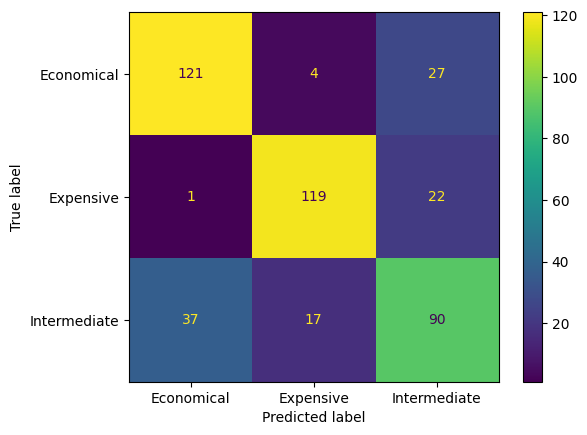

In [37]:
cm = confusion_matrix(y_test, y_pred_cv, labels=classifier_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_cv.classes_)
disp.plot()

#### 10.1 ¿Le fue mejor que al modelo anterior?

El modelo de árbol de clasificación entrenado con validación cruzada muestra un rendimiento bastante similar al modelo anterior que se ajustó sin validación cruzada. La validación cruzada proporciona una evaluación más exacta al evaluar el modelo en múltiples conjuntos de entrenamiento y prueba. Los puntajes de precisión para cada pliegue de la validación cruzada varían ligeramente, con una precisión promedio del 76%, lo que indica que el modelo mantiene su capacidad predictiva en diferentes subconjuntos de datos. Al evaluar el modelo en el conjunto de prueba separado, la precisión sigue siendo del 75%, similar al modelo sin validación cruzada. El informe de clasificación y la matriz de confusión confirman que el modelo mantiene su capacidad para predecir las categorías "Económicas", "Intermedias" y "Caras". En conclusión, a pesar de que la validación cruzada proporciona una evaluación más exacta del rendimiento del modelo, no se observan mejoras significativas en comparación con el modelo anterior.

### 11. Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol.

In [38]:
depths = [3, 5, 10]

results = []

for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((depth, accuracy))
    
for depth, accuracy in results:
    print(f"Depth: {depth}, Accuracy: {accuracy:.2f}")

Depth: 3, Accuracy: 0.75
Depth: 5, Accuracy: 0.78
Depth: 10, Accuracy: 0.77


#### 11.1 ¿Cuál funcionó mejor?
Entre los tres modelos con diferentes profundidades de árbol (3, 5 y 10), el modelo con una profundidad de 5 mostró el mejor rendimiento para la predicción de las categorías de precios de las viviendas. Con una precisión del 78%, este modelo supera ligeramente al modelo con una profundidad de 10 (77%) y al modelo con una profundidad de 3 (75%). El aumento en la profundidad del árbol hasta 5 parece presentar un buen equilibrio entre la complejidad del modelo y su capacidad para generalizar patrones en los datos. 

### 12. Repita el análisis usando Random Forest como algoritmo de predicción, explique sus resultados comparando ambos algoritmos.

#### 12.1 Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
forest = RandomForestClassifier(random_state=42)

In [41]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred_forest = forest.predict(X_test)

In [43]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Model Accuracy: {accuracy_forest:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

Model Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

  Economical       0.84      0.88      0.86       152
   Expensive       0.90      0.90      0.90       142
Intermediate       0.77      0.72      0.75       144

    accuracy                           0.84       438
   macro avg       0.83      0.84      0.83       438
weighted avg       0.83      0.84      0.83       438



In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))

Confusion Matrix:
[[134   1  17]
 [  0 128  14]
 [ 26  14 104]]


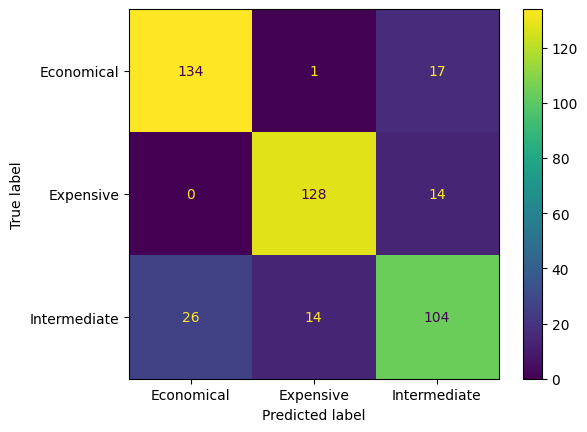

In [45]:
cm = confusion_matrix(y_test, y_pred_forest, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()

In [46]:
depths = [3, 5, 10]

results = []

for depth in depths:
    forest = RandomForestClassifier(max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((depth, accuracy))
    
for depth, accuracy in results:
    print(f"Depth: {depth}, Accuracy: {accuracy:.2f}")

Depth: 3, Accuracy: 0.79
Depth: 5, Accuracy: 0.82
Depth: 10, Accuracy: 0.83


#### 12.2 Random Forest with Cross Validation

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [48]:
forest_cv = RandomForestClassifier(random_state=42)

In [49]:
# Perform 5-fold cross validation
cv_scores = cross_val_score(forest_cv, X, y, cv=5)

In [50]:
# Print the accuracy of each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.2f}")

Fold 1: 0.85
Fold 2: 0.84
Fold 3: 0.85
Fold 4: 0.84
Fold 5: 0.82


In [51]:
forest_cv.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred_forest_cv = forest_cv.predict(X_test)

In [53]:
accuracy_forest_cv = accuracy_score(y_test, y_pred_forest_cv)
print(f"Model Accuracy: {accuracy_forest_cv:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest_cv))

Model Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

  Economical       0.84      0.88      0.86       152
   Expensive       0.90      0.90      0.90       142
Intermediate       0.77      0.72      0.75       144

    accuracy                           0.84       438
   macro avg       0.83      0.84      0.83       438
weighted avg       0.83      0.84      0.83       438



In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest_cv))

Confusion Matrix:
[[134   1  17]
 [  0 128  14]
 [ 26  14 104]]


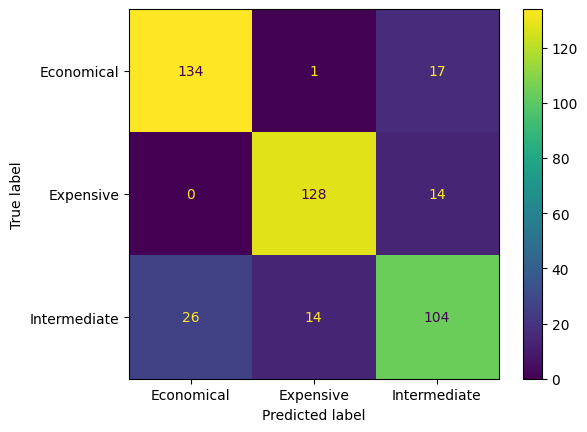

In [55]:
cm = confusion_matrix(y_test, y_pred_forest_cv, labels=forest_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_cv.classes_)
disp.plot()

In [56]:
depths = [3, 5, 10]

results = []

for depth in depths:
    forest = RandomForestClassifier(max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((depth, accuracy))
    
for depth, accuracy in results:
    print(f"Depth: {depth}, Accuracy: {accuracy:.2f}")

Depth: 3, Accuracy: 0.79
Depth: 5, Accuracy: 0.82
Depth: 10, Accuracy: 0.83


#### 12.3 Comparación de resultados


El modelo Random Forest ha demostrado un rendimiento general superior en comparación con el árbol de clasificación individual. En términos de precisión, el Random Forest alcanzó una tasa del 84%, superando al árbol de clasificación con una profundidad de 5 (78%) y mostrando una mejora significativa en la capacidad de generalización. Además, el informe de clasificación detallado y la matriz de confusión confirman que el Random Forest logra mejores resultados en términos de precisiones, sensibilidades y especificidades para cada clase de clasificación. La aplicación de validación cruzada en el Random Forest también respalda su robustez, ya que las puntuaciones de precisión para cada pliegue se mantuvieron consistentemente altas, en torno al 85%. En conclusión, el Random Forest, al considerar múltiples árboles de decisión, demuestra ser una opción más efectiva y exacta para predecir las categorías de precios de las viviendas en comparación con un solo árbol de clasificación.